In [118]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer

In [119]:
df = pd.read_csv('data/winequality-red.csv', sep=';')

In [120]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [122]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [123]:
X = df.drop(columns='alcohol')
y = np.log(df['alcohol'])

In [124]:
import seaborn as sns
import numpy as np

In [125]:
# sns.pairplot(df)

In [126]:
esc = PowerTransformer()
esc.fit(X)
X_esc = esc.transform(X)
X = X_esc

<Axes: ylabel='Frequency'>

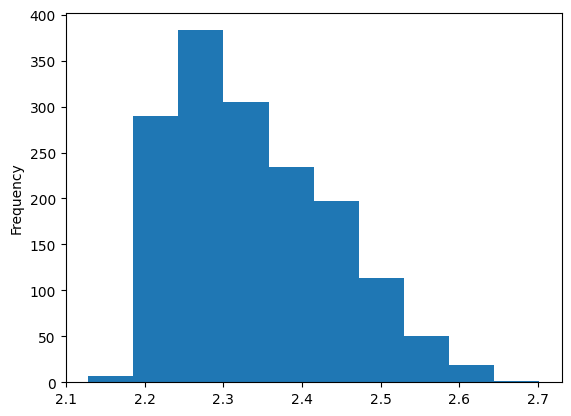

In [127]:

y.plot(kind='hist')

In [128]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
# sns.heatmap(np.where(np.abs(X.corr())>0.5,X.corr(),0),annot=True,color='red')

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error,r2_score,mean_absolute_percentage_error

In [130]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=69)

In [131]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print('RMSE', root_mean_squared_error(y_test,y_pred))
print('R2', r2_score(y_test,y_pred))
print('MAPE', mean_absolute_percentage_error(y_test,y_pred))

RMSE 0.06144886926582837
R2 0.6233138487405196
MAPE 0.02024006222750383


In [132]:
y_train

655     2.240710
116     2.302585
1465    2.272126
1170    2.351375
664     2.322388
          ...   
404     2.208274
439     2.230014
619     2.230014
1227    2.261763
1078    2.397895
Name: alcohol, Length: 1279, dtype: float64

In [166]:
import numpy as np
import pandas as pd

class LinearRegressionBootcamp():
    def __init__(self,normalized=False):
        self.coeficientes = None
        self.intercepto = None
        self.media = None
        self.desviacion_standar = None
        self.normalized = normalized

    def normalizado_futures(self,X):
        self.media = X.mean(axis=0)
        self.desviacion_standar = X.std(axis=0)
        return (X - self.media) / self.desviacion_standar
    
    def fit(self, df, target:str):
        X = df.drop(columns = target)
        y = df[target].values

        if self.normalized:
            X = self.normalizado_futures(X)

        X = np.c_[np.ones(X.shape[0]),X]

        theta = np.linalg.solve(X.T @ X, X.T @ y)

        self.intercepto = theta[0]
        self.coeficientes = theta[1:]

    def predict(self, df):
        if self.coeficientes is None or self.intercepto is None:
            raise ValueError('El modelo no esta entrenado')

        X = df.values()

        if self.normalized:
            X = (X - self.media) / self.desviacion_standar

        y_pred = self.intercepto + np.dot(X,self.coeficientes)

        return y_pred

In [167]:
model = LinearRegressionBootcamp(normalized=True)

In [168]:
model.fit(df,'alcohol')
print(f'Coeficientes {model.coeficientes}')
print(f'intercepto {model.intercepto}')

Coeficientes [ 0.85745535  0.10552457  0.15968768  0.36993179 -0.04390991 -0.03157529
 -0.04573902 -1.08263909  0.55842251  0.1617152   0.18753436]
intercepto 10.422983114446494
